<a href="https://colab.research.google.com/github/NadaAlsuhimi/Nada-Alsuhimi/blob/main/AI342Lab1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [26]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt


## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [27]:
# Task: Create an 8x8 black image (matrix of zeros)
# Hint: Use np.zeros((rows, cols))

image = np.zeros((8, 8))
print(image)
# --- Discussion Questions ---
# 1. What is the spatial resolution of this image?
#   The spatial resolution is 8×8 pixels
# 2. What does each value represent?
#   Each value represents the intensity of the pixel, The value 0 means completely black, and the value 255 means completely white.

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


##**Exercise 2.2: Visualise the image**

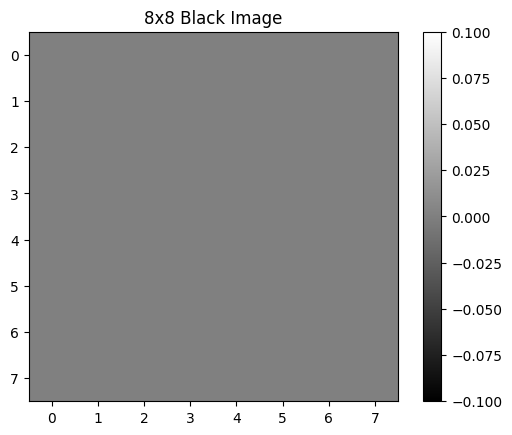

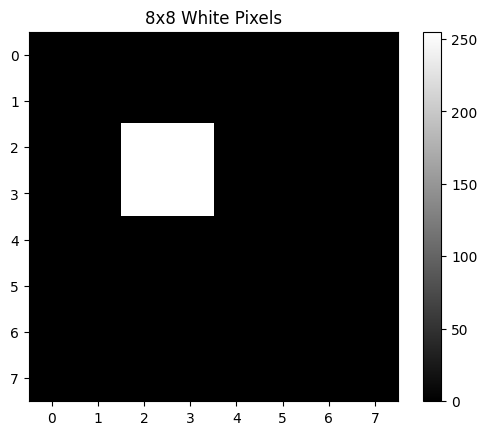

In [28]:
# write your code here
plt.imshow(image, cmap='gray')
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()
# Task: Change some pixels to 255 (White) and re-visualize
# image[row, col] = 255
# WRITE YOUR CODE HERE:
image[2, 2] = 255
image[2, 3] = 255
image[3, 2] = 255
image[3, 3] = 255

plt.imshow(image, cmap='gray')
plt.title("8x8 White Pixels")
plt.colorbar()
plt.show()

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


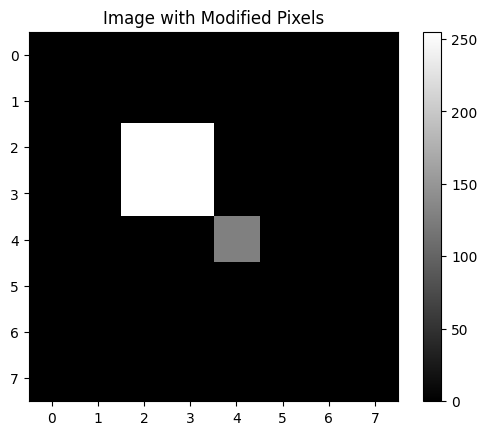

In [29]:
# write your code here
image[3, 3] = 255
image[4, 4] = 128

plt.imshow(image, cmap='gray')
plt.title("Image with Modified Pixels")
plt.colorbar()
plt.show()

#Questions
#1.	Which pixel is brighter and why?
# The pixel at position (3,3) is brighter because its value is 255 which is the maximum value white, while the pixel at (4,4) has a value of 128 which is midgray.
#2.	How does quantisation affect visual appearance?
# Quantisation determines the number of available brightness levels. With 256 levels (0-255), we get smooth transitions between colors,
# But if quantisation is low the image will show obvious steps instead of smooth gradients.


## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


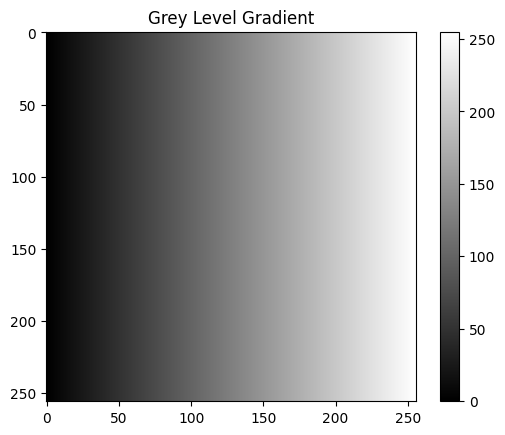

In [30]:
# write your code here
gradient = np.tile(np.linspace(0, 255, 256), (256, 1))

plt.imshow(gradient, cmap='gray')
plt.title("Grey Level Gradient")
plt.colorbar()
plt.show()

#Questions
#1.	How many grey levels are visible?
# There are 256 grey levels (from 0 to 255).but the human eye may not be able to distinguish between all these levels.
#2.	What data type is used to store the pixel values?
# The data type used is float64 in NumPy


## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(487, 736, 3)
uint8


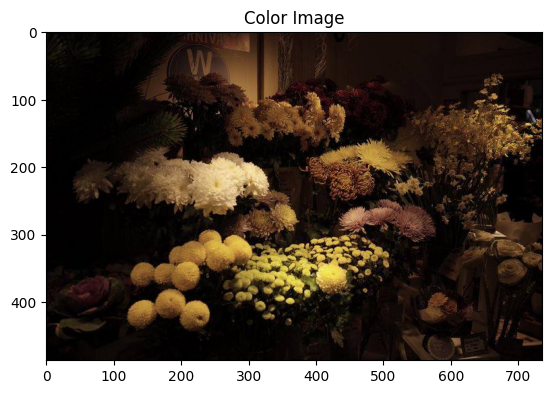

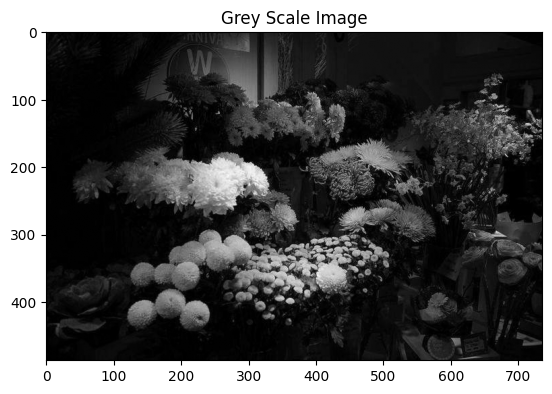

In [31]:
# write your code here
from matplotlib.image import imread

image = imread("/content/photo_2024-12-06_18-27-30.jpg")
print(image.shape)
print(image.dtype)
plt.imshow(image)
plt.title("Color Image")
plt.show()
#Task
gray = image.mean(axis=2)

plt.imshow(gray, cmap='gray')
plt.title("Grey Scale Image")
plt.show()

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

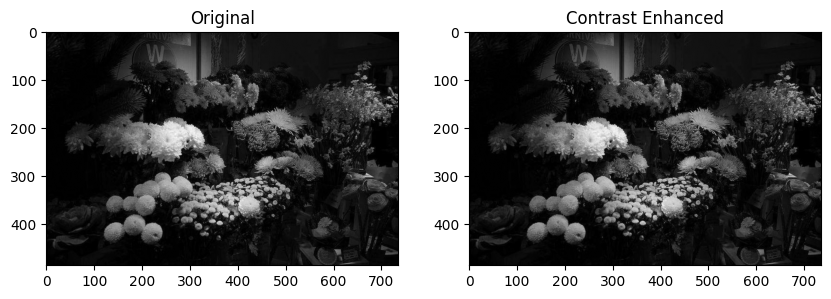

In [32]:
# write your code here
min_val = gray.min()
max_val = gray.max()

enhanced = (gray - min_val) / (max_val - min_val) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')

plt.title("Contrast Enhanced")
plt.show()

#Questions
#1.	Which image has better visibility of details?
#The enhanced image has better visibility of details because contrast stretching increases the difference between bright and dark areas, making details clearer.
#2.	Is this enhancement subjective or objective?
#This enhancement is subjective because it depends on human visual perception. What looks "better" may vary from person to person depending on the application and purpose.


## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

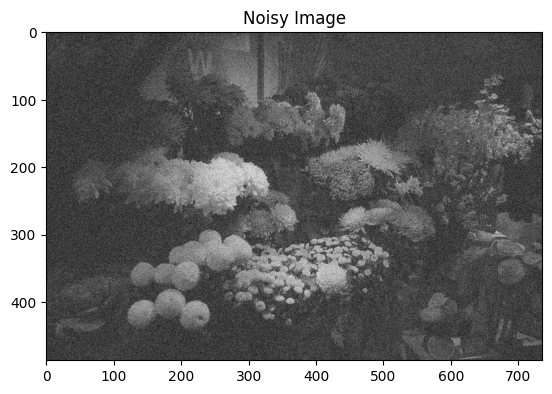

In [33]:
# write your code here
noise = np.random.normal(0, 20, gray.shape)
noisy = gray + noise

plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()

## **Exercise 7.2: Simple smoothing filter**

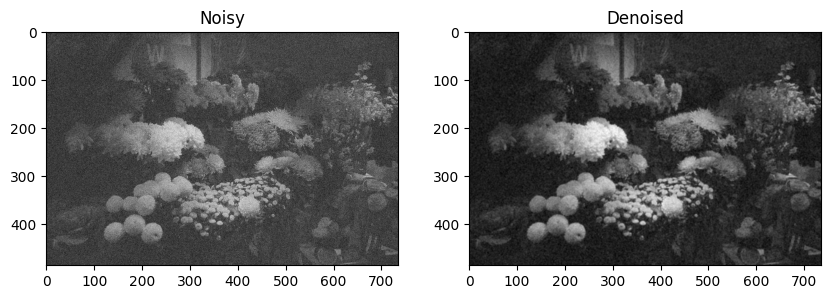

In [34]:
def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

# complete the code here

denoised = mean_filter(noisy)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")
plt.show()

## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

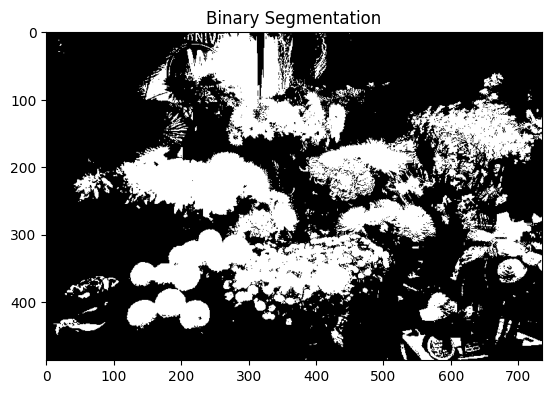

In [35]:
## write your code here
threshold = gray.mean()
binary = gray > threshold

plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

# Discussion:
# 1. Is this segmentation reliable?
# No, segmentation using the mean is not always reliable, It depends on the distribution of values in the image
# 2. What information is lost when converting to binary?
# We lose all the gray gradations, Instead of 256 levels, we only have two levels black and white.
# We lose fine details and smooth transitions, keeping only the general shape and boundaries.

#**9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

**Step 1 - Creating the image:**

Stage: Image Acquisition
In reality it comes from a camera, but here we created it synthetically

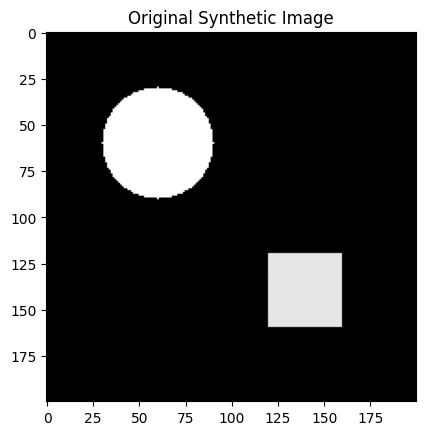

In [36]:
# Create a synthetic image containing at least two objects
synthetic = np.zeros((200, 200))

# Draw a circle
for i in range(200):
    for j in range(200):
        if (i - 60)**2 + (j - 60)**2 <= 30**2:
            synthetic[i, j] = 200

# Draw a square
synthetic[120:160, 120:160] = 180

plt.imshow(synthetic, cmap='gray')
plt.title("Original Synthetic Image")
plt.show()

**Step 2 - Adding noise:**

Stage: Simulating problems that occur during image acquisition

Noise occurs due to sensors or environmental conditions

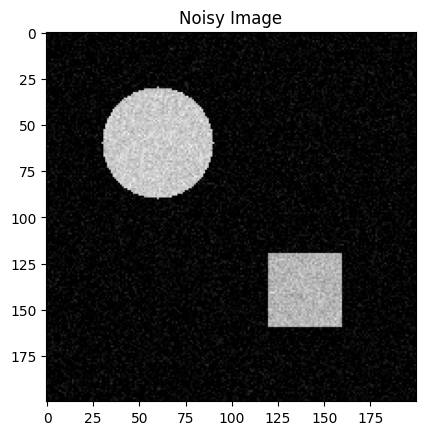

In [37]:
#Add noise to the image
noise = np.random.normal(0, 15, synthetic.shape)
noisy_synthetic = synthetic + noise
noisy_synthetic = np.clip(noisy_synthetic, 0, 255)

plt.imshow(noisy_synthetic, cmap='gray')
plt.title("Noisy Image")
plt.show()

**Step 3 - Denoising and enhancement:**

Stage: Low-level Processing

Type: Image → Image

We used Mean filter and Contrast stretching

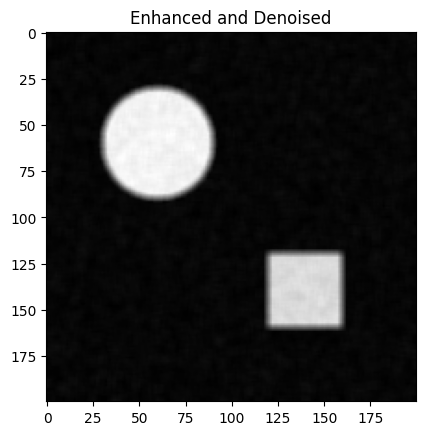

In [38]:
# Apply enhancement and denoising
denoised_synthetic = mean_filter(noisy_synthetic, k=5)

min_v = denoised_synthetic.min()
max_v = denoised_synthetic.max()
enhanced_synthetic = (denoised_synthetic - min_v) / (max_v - min_v) * 255

plt.imshow(enhanced_synthetic, cmap='gray')
plt.title("Enhanced and Denoised")
plt.show()

**Step 4 - Segmentation:**

Stage: Mid-level Processing

Type: Image → Objects/Regions

Here we start extracting meaningful information


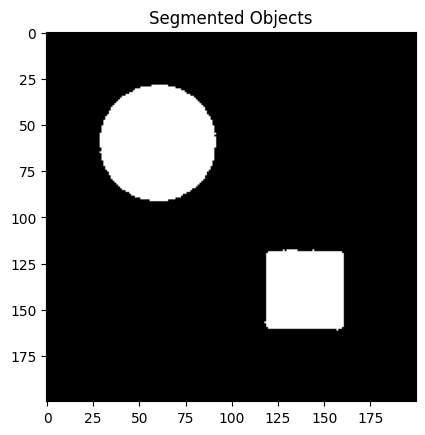

In [39]:
#Segment the objects using a threshold
thresh = enhanced_synthetic.mean() + 20
segmented = enhanced_synthetic > thresh

plt.imshow(segmented, cmap='gray')
plt.title("Segmented Objects")
plt.show()

**10. Reflection questions**

**1. Where does image processing end and image analysis begin in your mini project?**

Image processing ends at Step 3 (enhancement and denoising).

Image analysis begins at Step 4 (segmentation).

Image processing: Improving the image visually - input is image and output is image

Image analysis: Extracting information - input is image and output is information or objects




**2. Which steps correspond to low level processing only?**


Only the following steps:

1-Denoising using Mean filter

2-Contrast Enhancement




**3. Why is digitisation always an approximation of reality?**


Digitisation is an approximation of reality for several reasons:

**a) Spatial Quantization:**

The real world is continuous, but we divide it into discrete pixels
We lose details smaller than the pixel size

**b) Intensity Quantization:**

Light has infinite values, but we use only 256 levels
We lose very fine differences in brightness

**c) Noise:**

Cameras and sensors are not perfect
Noise enters from electronic circuits

**d) Loss of depth:**

Images are 2D but the world is 3D
We lose depth information

Simple example: When we photograph a smooth curved line it appears in the image as a series of small squares  this is an approximation not the actual continuous shape